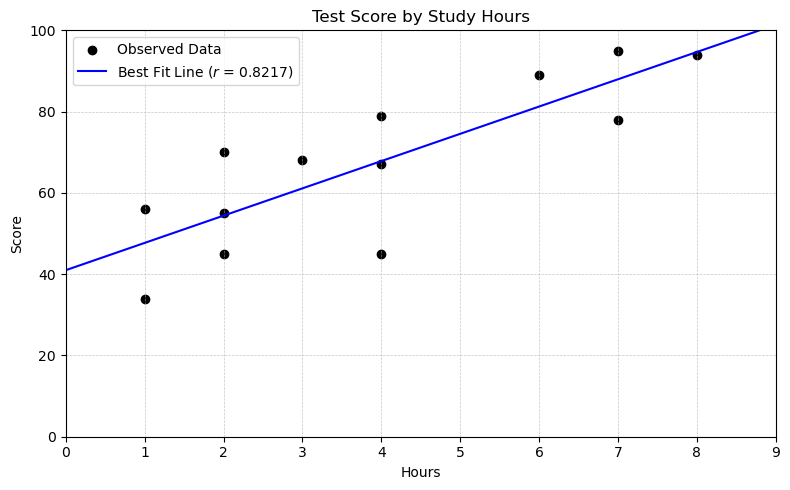

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Data from the hand-calculation
study_hours = [1, 1, 2, 2, 2, 3, 4, 4, 4, 6, 7, 7, 8]
test_scores = [34, 56, 45, 70, 55, 68, 67, 79, 45, 89, 95, 78, 94]

# Linear regression line
slope, intercept, r_value, _, _ = linregress(study_hours, test_scores)
x_vals = np.linspace(0, 9, 100)
y_vals = intercept + slope * x_vals

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(study_hours, test_scores, color='black', label='Observed Data')
plt.plot(x_vals, y_vals, color='blue', label=f'Best Fit Line ($r$ = {r_value:.4f})')

# Formatting
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Test Score by Study Hours")
plt.xlim(0, 9)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


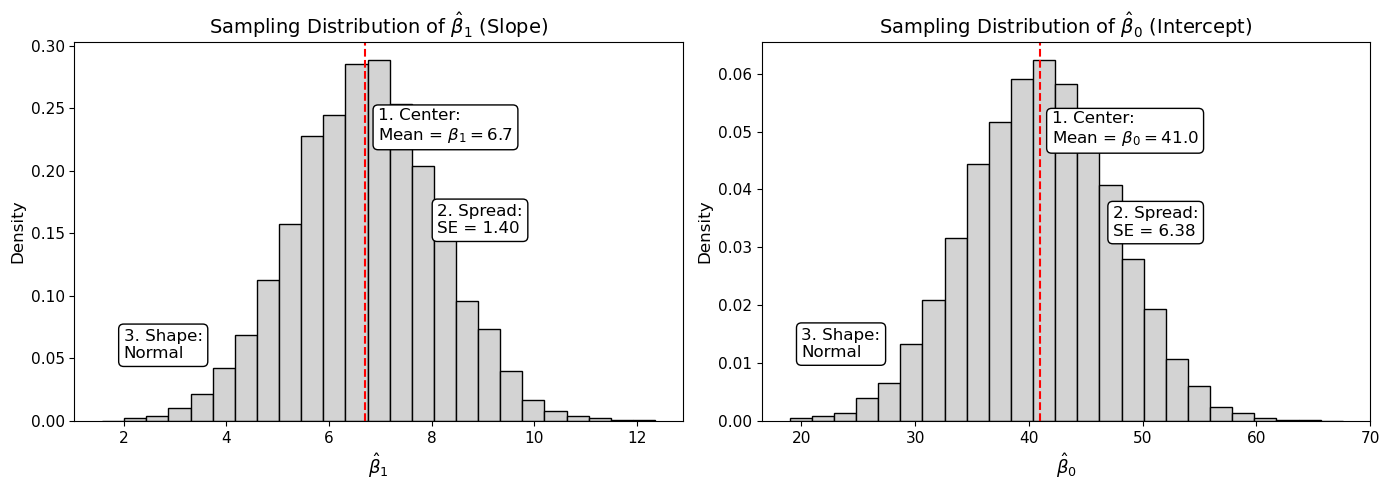

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters from the example
beta_1 = 6.708
beta_0 = 40.993
n = 13
x_bar = 3.923
s_x2 = 5.744
sigma_hat = 11.646

# Compute standard errors
SE_b1 = sigma_hat * np.sqrt(1 / ((n - 1) * s_x2))
SE_b0 = sigma_hat * np.sqrt((1 / n) + (x_bar**2 / ((n - 1) * s_x2)))

# Simulated sampling distributions
np.random.seed(1)
samples_b1 = np.random.normal(loc=beta_1, scale=SE_b1, size=10000)
samples_b0 = np.random.normal(loc=beta_0, scale=SE_b0, size=10000)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for slope
axes[0].hist(samples_b1, bins=25, color='lightgray', edgecolor='black', density=True)
axes[0].axvline(beta_1, color='red', linestyle='--')
axes[0].set_title(r"Sampling Distribution of $\hat{\beta}_1$ (Slope)", fontsize=14)
axes[0].set_xlabel(r"$\hat{\beta}_1$", fontsize=13)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=11)
axes[0].text(beta_1 + 0.25, 0.225, "1. Center:\nMean = $\\beta_1 = 6.7$", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)
axes[0].text(beta_1 + SE_b1, 0.15, f"2. Spread:\nSE = {SE_b1:.2f}", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)
axes[0].text(2, 0.05, "3. Shape:\nNormal", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)

# Histogram for intercept
axes[1].hist(samples_b0, bins=25, color='lightgray', edgecolor='black', density=True)
axes[1].axvline(beta_0, color='red', linestyle='--')
axes[1].set_title(r"Sampling Distribution of $\hat{\beta}_0$ (Intercept)", fontsize=14)
axes[1].set_xlabel(r"$\hat{\beta}_0$", fontsize=13)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=11)
axes[1].text(beta_0 + 1, 0.048, "1. Center:\nMean = $\\beta_0 = 41.0$", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)
axes[1].text(beta_0 + SE_b0, 0.032, f"2. Spread:\nSE = {SE_b0:.2f}", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)
axes[1].text(20, 0.011, "3. Shape:\nNormal", bbox=dict(boxstyle="round", facecolor="white"), fontsize=12)

plt.tight_layout()
plt.show()


In [19]:
y = [34, 56, 45, 70, 55, 68, 67, 79, 45, 89, 95, 78, 94]
x = [1, 1, 2, 2, 2, 3, 4, 4, 4, 6, 7, 7, 8]

beta_1 = 6.708
beta_0 = 40.993

y_hat = np.zeros(len(x_i))
for i in range(len(x_i)):
    y_hat[i] = beta_0 + beta_1 * x[i]
print(y_hat)

e = y - y_hat
print(e)

SSE = np.sum(e**2)
print(SSE)

sigma_hat = np.sqrt(SSE / (len(x) - 2))
print(sigma_hat)


[47.701 47.701 54.409 54.409 54.409 61.117 67.825 67.825 67.825 81.241
 87.949 87.949 94.657]
[-13.701   8.299  -9.409  15.591   0.591   6.883  -0.825  11.175 -22.825
   7.759   7.051  -9.949  -0.657]
1491.7991409999995
11.64551861134886


In [ ]:
# SE of beta_1
11.646 * np.sqrt(1/((13 - 1)*5.744))

1.4027457033819588

In [49]:
# SE of beta_0
11.646 * np.sqrt((1/13) + ((3.923**2)/((13 - 1) * 5.744)))

6.3808869661606185

In [55]:
11.646 * 0.5479


6.380843400000001

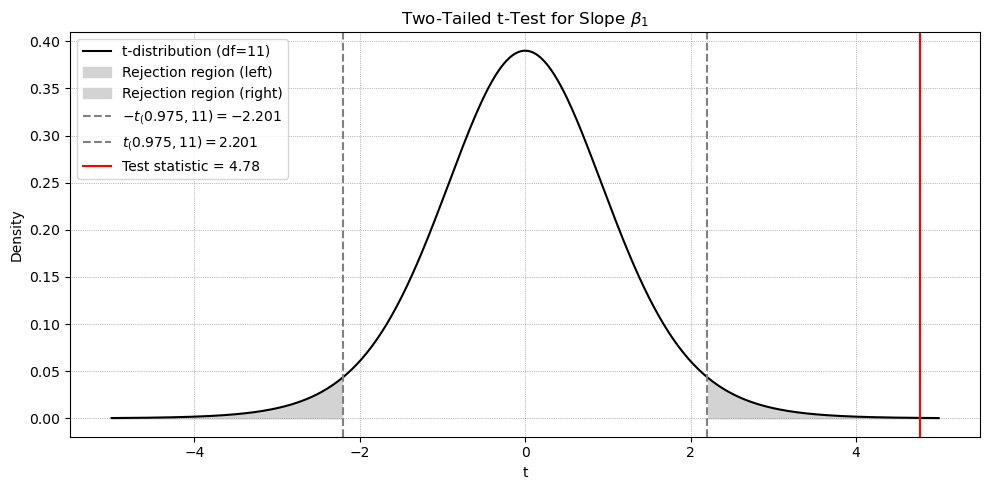

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 11
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df)  # two-tailed critical value
t_stat = 4.78

# Plot range
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, color='black', label='t-distribution (df=11)')

# Fill rejection regions
plt.fill_between(x, y, where=(x <= -t_crit), color='lightgray', label='Rejection region (left)')
plt.fill_between(x, y, where=(x >= t_crit), color='lightgray', label='Rejection region (right)')

# Add critical values and test statistic
plt.axvline(-t_crit, color='gray', linestyle='--', label=fr'$-t_{{0.975,\ {df}}} = -{t_crit:.3f}$')
plt.axvline(t_crit, color='gray', linestyle='--', label=fr'$t_{{0.975,\ {df}}} = {t_crit:.3f}$')
plt.axvline(t_stat, color='red', linestyle='-', label=fr'Test statistic $t = {t_stat:.2f}$')

# Labels and legend
plt.title('Two-Tailed t-Test for Slope $\\beta_1$')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()

# Faint grid
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()
